# Case Study - Part 1


In [2]:

from cslib import *


In [4]:
#load data and create a training set (dataframe)
data_train='./training'
df_raw=  fetch_data(data_train)
df_raw.head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,17998.0,28,489562,11,5.95,84656,1,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28
3,United Kingdom,13085.0,28,489434,11,1.25,21232,5,2017,2017-11-28
4,United Kingdom,13085.0,28,489434,11,1.65,22064,17,2017,2017-11-28


Question 1 Quiz Week 3

In [5]:
df_invoice_date=df_raw['invoice_date'].unique()
span_days=df_invoice_date.max()-df_invoice_date.min()
span_days=span_days.astype('timedelta64[D]')
days_num=span_days/np.timedelta64(1, 'D')
print('Number of days: ',days_num)

Number of days:  610.0


In [6]:
df_ts=convert_to_ts(df_raw)

In [7]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             607 non-null    datetime64[ns]
 1   purchases        607 non-null    int64         
 2   unique_invoices  607 non-null    int64         
 3   unique_streams   607 non-null    int64         
 4   total_views      607 non-null    int64         
 5   year_month       607 non-null    object        
 6   revenue          607 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 33.3+ KB


Question 2 Week 3

In [8]:
# For answering week 3 quiz question 2
df_ts_SG=convert_to_ts(df_raw, country='Singapore')
df_ts_UK=convert_to_ts(df_raw, country='United Kingdom')
df_ts_GE=convert_to_ts(df_raw, country='Germany')
df_ts_USA=convert_to_ts(df_raw, country='USA')
df_ts_EIRE=convert_to_ts(df_raw, country='EIRE')

In [9]:
df_ts_EIRE.head()

,date,purchases,unique_invoices,unique_streams,total_views,year_month,revenue
0,2017-11-01,0,0,0,0,2017-11,0.0
1,2017-11-02,0,0,0,0,2017-11,0.0
2,2017-11-03,0,0,0,0,2017-11,0.0
3,2017-11-04,0,0,0,0,2017-11,0.0
4,2017-11-05,0,0,0,0,2017-11,0.0


In [10]:
df_total_revenue=pd.DataFrame({'Country':['UK','Singapore','USA','EIRE','Germany'],
                              'Revenue':[df_ts_UK['revenue'].sum(),df_ts_SG['revenue'].sum(),df_ts_USA['revenue'].sum(),df_ts_EIRE['revenue'].sum(),df_ts_GE['revenue'].sum()]})

df_total_revenue

,Country,Revenue
0,UK,3343551.644
1,Singapore,12945.460
2,USA,1110.900
3,EIRE,104589.400
4,Germany,45651.261


In [11]:
df_total_revenue[df_total_revenue['Revenue']==df_total_revenue['Revenue'].max()]

,Country,Revenue
0,UK,3343551.644


In [12]:
X,y,dates=engineer_features(df_ts)

In [13]:
X

,previous_7,previous_14,previous_28,previous_70,previous_year,recent_invoices,recent_views
0,14450.54,14450.54,14450.54,14450.540,0.00,5.928571,537.392857
1,27862.50,27862.50,27862.50,27862.500,0.00,10.310345,1007.103448
2,41152.75,41152.75,41152.75,41152.750,0.00,14.966667,1499.066667
3,50840.03,50840.03,50840.03,50840.030,0.00,18.533333,1916.533333
4,52283.29,52283.29,52283.29,52283.290,0.00,19.600000,2026.966667
...,...,...,...,...,...,...,...
544,35654.01,88316.24,184306.67,378375.021,223505.56,70.000000,6702.533333
545,23045.09,67418.62,184306.67,375436.261,227317.94,70.000000,6702.533333
546,20834.33,62382.30,160811.46,370127.071,234869.69,71.366667,6839.200000
547,22111.84,62893.44,163049.25,371180.251,237016.78,73.533333,7026.733333


<AxesSubplot:xlabel='Country'>

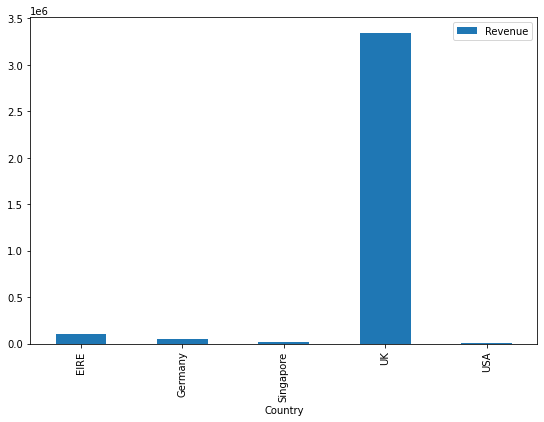

In [19]:
# plot the top 10 countries by revenue
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(121)
table_c = pd.pivot_table(df_total_revenue.head(11), index='Country', values='Revenue')
table_c.plot(kind='bar',ax=ax1)